# create a black body Transient

`skysurvey` contains a simple module (`skysurvey.tools.blackbody`) that contains basic functionality to create a black body transtient, whose amplitude and temperature can evolve as a function of phase. 

It thus can be used to set a time serie transient (skysurvey.TSTransient) as a generic transient model.


***
## Create a Black Body Transient source

a black body transient has three component:
- *phase*: array in days
- *temperature*: one per phase, could be constant
- *amplitude*: one per phase


Say we want to create a transient that will exponentially decay in flux, while getting cooler

In [4]:
import numpy as np
from skysurvey.tools import blackbody

In [30]:
phase = np.linspace(0, 100, 50) # phase definition range
time_scale=5.
amplitude = np.exp(-phase/time_scale) # fast decay
temperature = np.linspace(20_000, 5_000, len(phase)) # goes down from 20k to 5k Kelvin

let's see how it looks from 1 000 to 10 000 Angstrom

In [31]:
lbda = np.linspace(800, 10_000, 1000)
fluxes = blackbody.get_blackbody_transient_flux(lbda, temperature=temperature, amplitude=amplitude)

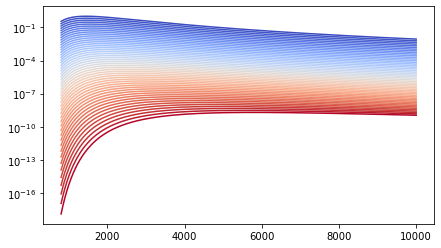

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[7,4])
ax = fig.add_subplot(111)

cmap = plt.get_cmap("coolwarm_r") # blue is hot
colors = cmap((temperature - temperature.min())/(temperature.max()-temperature.min()))
_ = [ax.plot(lbda, flux_, color=c) for flux_,c in zip(fluxes, colors)]
ax.set_yscale("log")

To get the `sncosmo.TimeSeriesSources` associated to that do, you can use:

In [40]:
bb_source = blackbody.get_blackbody_transient_source(phase=phase, 
                                                    amplitude=amplitude, 
                                                    temperature=temperature, 
                                                   lbda=lbda) # lbda has a default

## Use that to create a skysurvey target

In [43]:
import skysurvey
bb_transient = skysurvey.TSTransient(bb_source)

and use it as usual

In [45]:
bb_transient.draw(1000, inplace=True, zmax=0.05, tstart="2018-06-10", tstop="2019-10-01")

,z,t0,magabs,magobs,amplitude,ra,dec,template
0,0.0475,58492.917969,-19.191141,17.501118,4.160976e-15,318.533478,-42.468357,bb_transient
1,0.0225,58498.386719,-17.713640,17.316551,4.931990e-15,330.921692,7.018897,bb_transient
2,0.0445,58533.238281,-17.538025,19.007900,1.038681e-15,113.697273,-10.048860,bb_transient
3,0.0315,58485.074219,-19.090195,16.685028,8.823302e-15,271.259521,-8.754927,bb_transient
4,0.0385,58597.300781,-18.577682,17.644352,3.646710e-15,307.160004,-25.681547,bb_transient
...,...,...,...,...,...,...,...,...
995,0.0475,58627.394531,-17.172358,19.519901,6.481595e-16,16.521893,18.062544,bb_transient
996,0.0465,58635.191406,-19.929432,16.715069,8.582515e-15,278.602570,81.465393,bb_transient
997,0.0285,58299.574219,-15.629739,19.923378,4.469827e-16,183.311356,42.363636,bb_transient
998,0.0225,58368.027344,-18.294930,16.735262,8.424378e-15,304.070068,13.531969,bb_transient


or, more generically

In [47]:
flat_magabs_model = {"magabs":{"func": np.random.uniform, "kwargs":{"low":-18, "high":-15}}}

bb_transient = skysurvey.TSTransient.from_draw(size=1000, template=bb_source,
                                              tstart="2018-06-10", tstop="2019-10-01",
                                              model=flat_magabs_model)

In [48]:
bb_transient

{'redshift': {'kwargs': {'zmax': 0.05}, 'as': 'z'},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1093f7640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1093f7640>,
            'kwargs': {'low': -18, 'high': -15}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'amplitude': {'func': 'magobs_to_amplitude', 'kwargs': {'magobs': '@magobs'}},
 'radec': {'func': <function random_radec at 0x296b4cf70>, 'as': ['ra', 'dec']}}

In [49]:
bb_transient.data

,z,t0,magabs,magobs,amplitude,ra,dec,template
0,0.0445,58540.160156,-15.887897,20.658028,2.272121e-16,60.175255,47.641422,bb_transient
1,0.0355,58307.421875,-15.305688,20.735458,2.115722e-16,287.561584,-48.719982,bb_transient
2,0.0305,58434.007812,-16.296543,19.407036,7.191635e-16,245.787521,6.398428,bb_transient
3,0.0255,58397.296875,-17.101751,18.205046,2.175826e-15,150.021851,56.035976,bb_transient
4,0.0225,58390.644531,-16.538809,18.491381,1.671437e-15,155.195236,13.290114,bb_transient
...,...,...,...,...,...,...,...,...
995,0.0385,58717.601562,-15.918970,20.303066,3.150763e-16,55.223614,4.612903,bb_transient
996,0.0435,58638.941406,-16.580090,19.914923,4.504778e-16,111.257767,48.796371,bb_transient
997,0.0365,58408.253906,-17.737062,18.365986,1.876066e-15,122.067268,69.206398,bb_transient
998,0.0455,58588.230469,-16.179472,20.416267,2.838805e-16,145.690247,11.741833,bb_transient
